# Clustering Sprint Challenge

Objectives:
* Describe two clustering algorithms
* Create k clusters with k-Means algorithm
* Compare/contrast the performance of your two algorithms with two datasets

### 1. Describe two different clustering algorithms

There are many clustering algorithms with profoundly different implementations. Their objective is the same - to identify groups in unlabeled data.

Fill out the below python objects.

# Clustering algorithm 1:

algorithm_one_name = "K-means"

algorithm_one_description = K-means is intuitively simple.

For a given number of desired centroids (Centroids number is a parameter), the algorithm will pick a random initial point for each centroid and calculates the Euclidean distance from each point to all the centroids. Points will be grouped based on proximity to closest centroid, creating the first round of groups. Upon creation of first group the centroid for each group will be pushed to the center of the group (also based on Euclidean distance). The same loop will be conducted over and over again until the position of the centroids cannot be further improved, which also implies that elements on each group are located in such group where the distance to its corresponding centroid is the minimum distance with respect to any other centroid.

# Clustering algorithm 2:

algorithm_two_name = "Bayesian Mixture Model"
algorithm_two_description = It goes beyond the initial K means model but considering that clusters follow a normal distribution. In that way it becomes a multi variate normal distribution set where their unknown means and covariances should be considered while classifing / assigning vectors to each cluster

### 2. Create k clusters with k-Means algorithm

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics
# Dataset
set1 = pd.read_csv('https://www.dropbox.com/s/zakq7e0r8n1tob9/clustering_set1.csv?raw=1',index_col=0)

set1.head()

,x,y
0,0.649105,-3.072988
1,-0.257974,-4.430689
2,0.054035,-4.404372
3,-0.036780,-2.815223
4,0.319785,-4.395542


In [2]:
set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 2 columns):
x    3000 non-null float64
y    3000 non-null float64
dtypes: float64(2)
memory usage: 70.3 KB


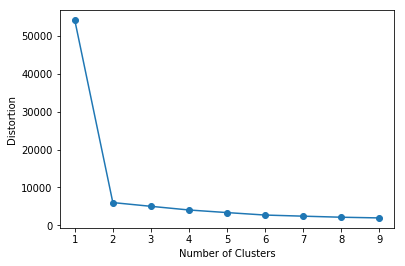

In [3]:
distortions = []

for i in range(1,10):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state = 0)
    km.fit(set1)
    distortions.append(km.inertia_)

plt.plot(range(1,10),distortions,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()


# Create kmeans object

# Fit kmeans object to data

# Print location of clusters learned by kmeans object

### It seems that 2 cluster would do a good job
------------------------------------------------

In [4]:
km2 = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter=300,random_state = 0)
fit =km2.fit(set1)

In [5]:
print('Cluster 1 location: {} \nCluster 2 location: {}'.format(fit.cluster_centers_[0],fit.cluster_centers_[1]))

Cluster 1 location: [0.03215312 3.99663419] 
Cluster 2 location: [ 0.03429001 -4.01502973]


In [6]:
set1.describe()

,x,y
count,3000.000000,3000.000000
mean,0.033222,-0.009198
std,1.006044,4.128199
min,-4.125019,-7.797931
25%,-0.652390,-4.025158
50%,0.051752,-0.178821
75%,0.731461,4.016148
max,3.619726,7.701499


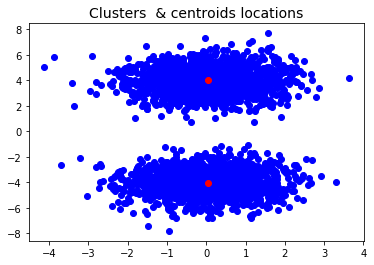

In [23]:
plt.plot(set1.x.values, set1.y.values,'bo')
plt.plot(fit.cluster_centers_[0][0],fit.cluster_centers_[0][1],'ro')
plt.plot(fit.cluster_centers_[1][0],fit.cluster_centers_[1][1],'ro')
plt.title('Clusters  & centroids locations',fontsize =14);

### 3. Compare/contrast the performance of your two algorithms with two datasets

In [8]:
# Second dataset
set2 = pd.read_csv('https://www.dropbox.com/s/zakq7e0r8n1tob9/clustering_set2.csv?raw=1',index_col=0)
set2.head()

,x,y
0,0.649105,-3.072988
1,-0.257974,-4.430689
2,0.054035,-4.404372
3,-0.036780,-2.815223
4,0.319785,-4.395542


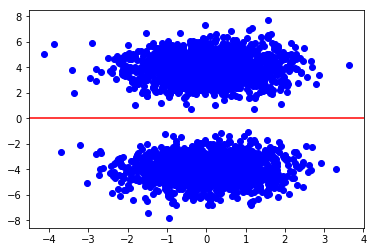

In [9]:
plt.plot(set2.x.values, set2.y.values,'bo')
plt.axhline(y=0,color='red')

In [11]:
solucion = fit.predict(set2)
set2['predict'] = solucion

In [12]:
set2['categories']= np.where(set2.y > 0,1, 0)
#set2.sort_values(by='categories',inplace=True)

In [13]:
set2.shape

(3000, 4)

In [17]:
colores = np.hstack(np.array(set2.categories))
solucion_color = np.hstack(np.array(set2.predict))
colores.shape

(3000,)

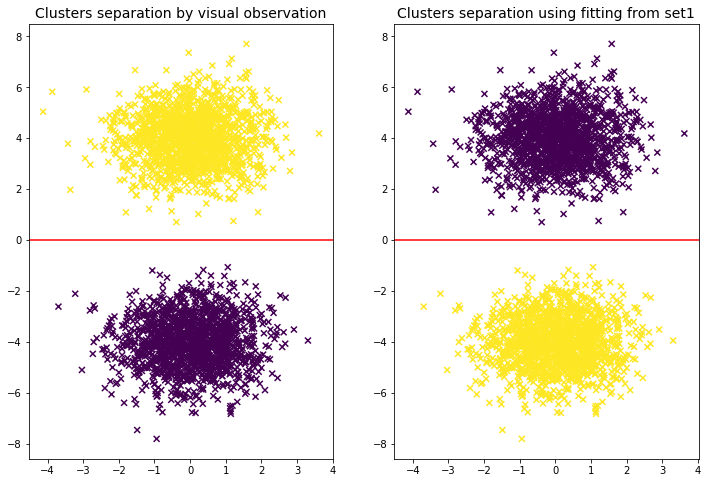

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.scatter(set2.x.values, set2.y.values,c = colores,marker = 'x')
plt.axhline(y=0,color='red')
plt.title('Clusters separation by visual observation',fontsize = 14)
plt.subplot(122)
plt.scatter(set2.x.values, set2.y.values,c = solucion_color,marker = 'x')
plt.axhline(y=0,color='red')
plt.title('Clusters separation using fitting from set1',fontsize = 14)

plt.show()